<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-luiscruzn/blob/main/Data_Analysis_with_Python_Modulo_04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Ciencia y analítica de datos**

##**Actividad Semanal -- Data Analysis with Python Modulo 04**

###**Profra:** Dra. María de la Paz Rico Fernández.

###**Alumno:** Luis Salvador Cruz Nájera

###**Matrícula:** A01002111

###**Fecha:** 31 de octubre de 2022

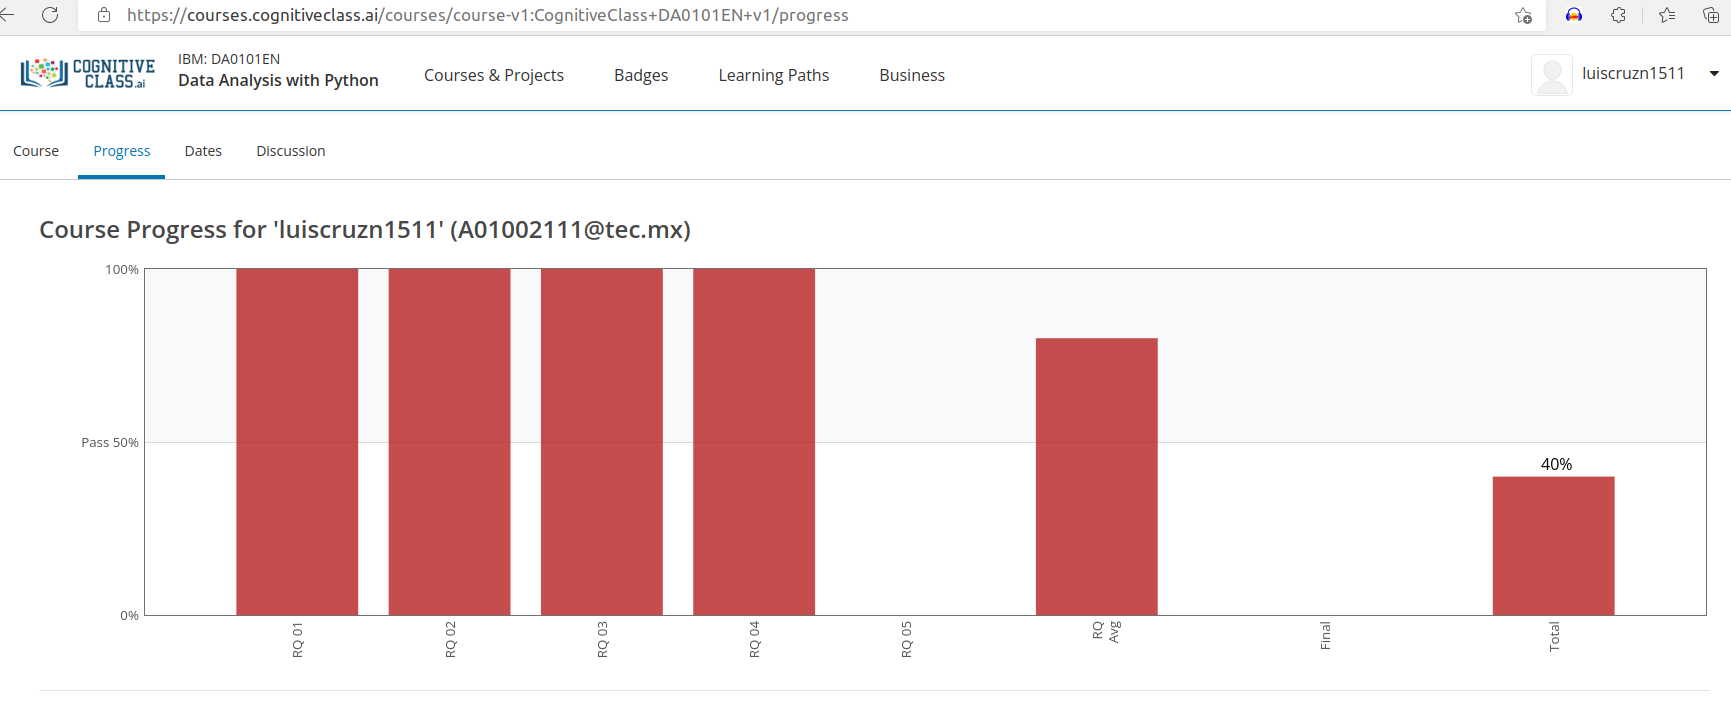

#**Model Development**

En este modulo vimos el desarrollo del modelo tratando de predecir el precio de un automóvil utilizando nuestro conjunto de datos usando Regresión lineal simple y múltiple, evaluación de modelos mediante visualización, Regresión polinomial y canalizaciones, R-cuadrado y MSE para evaluación dentro de la muestra y predicción y toma de decisiones

Cuantos más datos relevantes tengamos, más preciso será nuestro modelo. Por ejemplo, si ingresamos múltiples variables o características independientes en nuestro modelo. Por lo tanto, podemos predecir un precio más preciso para el automóvil. Para comprender por qué es importante contar con más datos, consideremos la siguiente situación: 

- Tenemos dos autos casi idénticos 
- Los autos rosados ​​se venden por mucho menos 

Queremos usar nuestro modelo para determinar el precio de dos autos, uno rosa y uno rojo. Si las características o las variables independientes de nuestro modelo no incluyen el color, el modelo pronosticará el mismo precio para automóviles que pueden venderse por mucho menos.

#**Linear and Multiple Linear Regression**

La regresión lineal se referirá a una variable independiente para hacer una predicción. La regresión lineal múltiple se referirá a múltiples variables independientes para hacer una predicción. La regresión lineal simple (o SLR) es: Un método que nos ayuda a comprender la relación entre dos variables: la variable predictora (independiente) x y la variable objetivo (dependiente) y. 

El parámetro b0 es la intersección, el parámetro b1 es la pendiente. Cuando ajustemos o entrenemos el modelo, obtendremos estos parámetros. Es difícil calcular cuánto cuesta un automóvil, pero las millas por galón en carretera están en el manual del propietario. Si asumimos que existe una relación lineal entre estas variables, podemos usar esta relación para formular un modelo para determinar el precio del automóvil. Si Highway Miles per Gallon es 20, podemos ingresar su valor en el modelo para obtener una predicción de $22,000. Para determinar la línea. 

El valor que nos gustaría predecir se llama objetivo y lo almacenamos en la matriz y, almacenamos la variable dependiente en el dataframe o matriz X. Cada muestra corresponde a una fila diferente en cada dataframe o matriz. En muchos casos, muchos factores influyen en cuánto paga la gente por un automóvil, por ejemplo, la marca o la antigüedad del automóvil. En este modelo, esta incertidumbre se tiene en cuenta asumiendo que se agrega un pequeño valor aleatorio al punto de la línea; esto se llama bias. 

Podemos resumir el proceso de la siguiente manera: 

- Tenemos un conjunto de puntos de entrenamiento 
- Usamos estos puntos de entrenamiento para ajustar o entrenar el modelo y obtener parámetros 
- Luego usaremos estos parámetros en el modelo 
- Ahora tenemos un modelo; usamos el símbolo de sombrero en la "y" para indicar que el modelo es una estimación. Podemos usar este modelo para predecir valores que no hemos visto. Por ejemplo, no tenemos un automóvil con 20 millas de carretera por galón, podemos usar nuestro modelo para hacer una predicción del precio de este automóvil. 

El modelo no siempre es correcto. Podemos ver esto comparando el valor predicho con el valor real. Tenemos una muestra de 10 millas de carretera por galón, pero el valor predicho no coincide con el valor real. Si la suposición lineal es correcta, este error se debe a la desviación, pero puede haber otras razones. 

La regresión lineal múltiple se utiliza para explicar la relación entre: - Una variable objetivo continua (Y) y - Dos o más variables predictoras (X). Si tenemos por ejemplo 4 variables predictoras, entonces: - B0: intercepto (X=0) - B1: el coeficiente o parámetro de 𝑋1: - B2: el coeficiente del parámetro 𝑋2: y así sucesivamente. Si solo hay dos variables entonces puede visualizar los valores. 

In [1]:
# Importando librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Descargando el dataset de autos
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


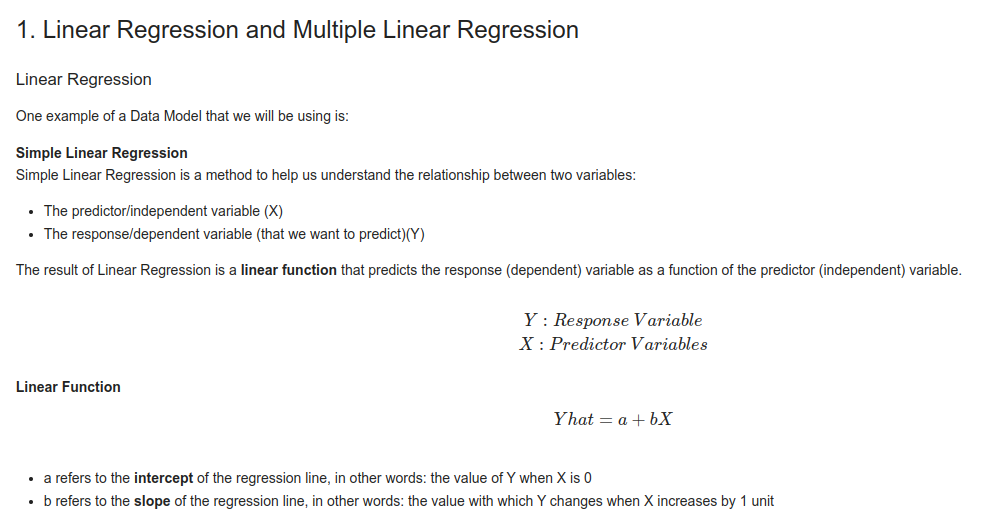

In [3]:
# Cargar librería de Linear Regression
from sklearn.linear_model import LinearRegression

In [5]:
# Crear objeto de Linear Regression
lm = LinearRegression()
lm

LinearRegression()

In [7]:
# ¿Cómo podría "Highway-mpg" ayudarnos a predecir el precio del automóvil?
# Para este ejemplo, queremos ver cómo Highway-mpg puede ayudarnos a predecir el precio del automóvil. 
# Usando una regresión lineal simple, crearemos una función lineal con "highway-mpga" como la variable predictora y "price" como la variable de respuesta.
X = df[['highway-mpg']]
Y = df['price']

In [9]:
# Ajustamos el modelo lineal usando highway-mpg:
lm.fit(X,Y)

LinearRegression()

In [10]:
# Podemos generar una predicción:
Yhat=lm.predict(X)
Yhat[0:5]  

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [11]:
# Valor del intercepto a
lm.intercept_

38423.3058581574

In [12]:
# Valor de la pendiente b
lm.coef_

array([-821.73337832])

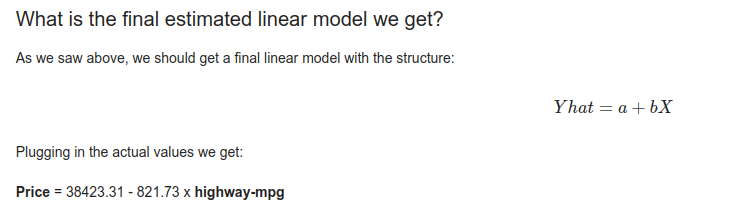

In [13]:
# Crear un objeto de regresión lineal llamado "lm1".
lm1 = LinearRegression()
lm1

LinearRegression()

In [14]:
# Entrenar el modelo utilizando "engine-size" como variable independiente y "price" como variable dependiente?
lm1.fit(df[['engine-size']], df[['price']])
lm1

LinearRegression()

In [15]:
# Encontrar la pendiente y el intercepto
lm1.coef_

array([[166.86001569]])

In [16]:
lm1.intercept_

array([-7963.33890628])

In [17]:
# ¿Cuál es la ecuación de la línea predicha?
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

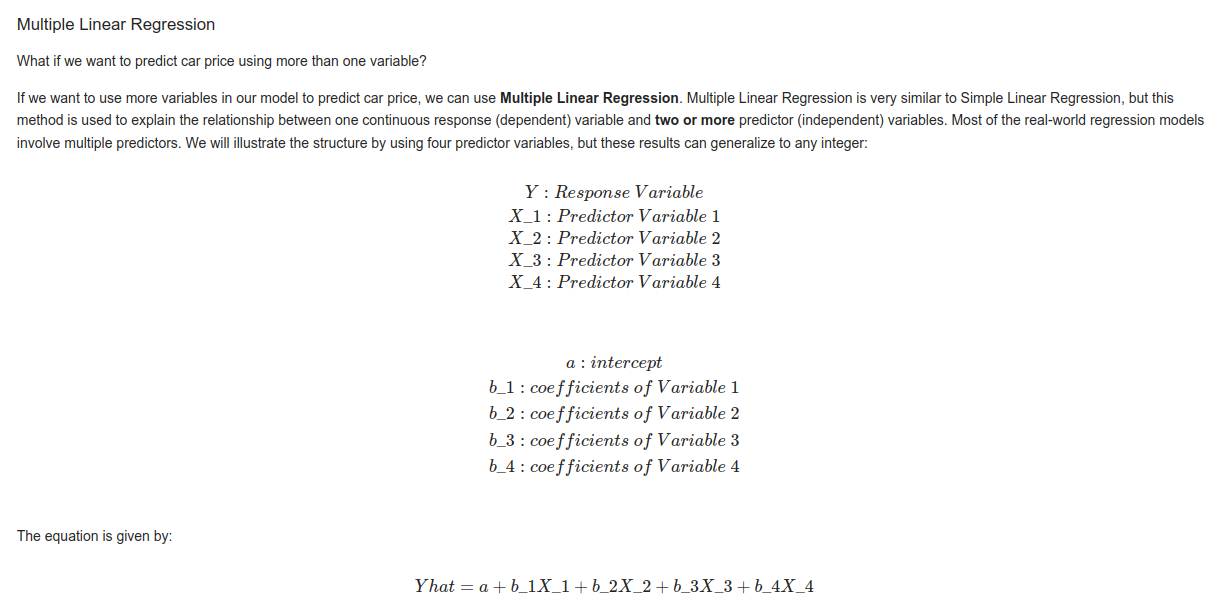

In [18]:
# Desarrollemos un modelo usando estas variables como variables predictoras.
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [19]:
# Ajustamos el modelo lineal utilizando las cuatro variables mencionadas anteriormente.
lm.fit(Z, df['price'])

LinearRegression()

In [20]:
#¿Cuál es el valor del intercepto(a)?
lm.intercept_

-15806.62462632922

In [21]:
#¿Cuáles son los valores de los coeficientes (b1, b2, b3, b4)?
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

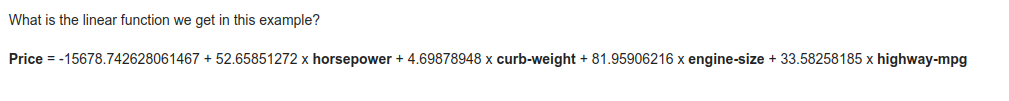

In [22]:
# Creamos y entrenamos un modelo de regresión lineal múltiple "lm2" en el que la variable de respuesta sea "price" y la variable de predicción 
# sea "normalized-losses" y "highway-mpg".
lm2 = LinearRegression()
lm2.fit(df[['normalized-losses' , 'highway-mpg']],df['price'])

LinearRegression()

In [23]:
# Encontrar el coeficiente
lm2.coef_

array([   1.49789586, -820.45434016])

#**2. Model Evaluation Using Visualization**

(0.0, 48157.54798450807)

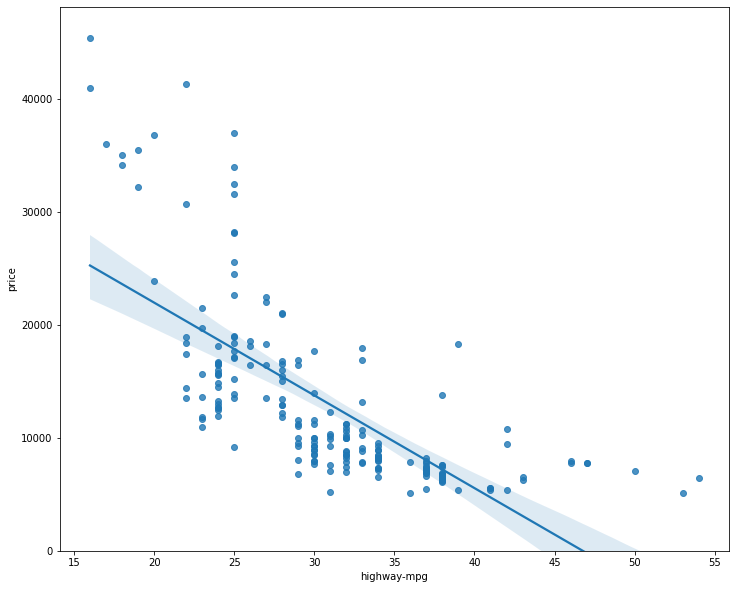

In [24]:
# Ahora que hemos desarrollado algunos modelos, ¿cómo evaluamos nuestros modelos y elegimos el mejor? Una forma de hacerlo es usando una visualización.

# Regression Plot
# Cuando se trata de regresión lineal simple, una excelente manera de visualizar el ajuste de nuestro modelo es mediante gráficos de regresión.

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

In [26]:
# Podemos ver en este gráfico que el precio está negativamente correlacionado con el highway-mpg ya que la pendiente de regresión es negativa.

# Una cosa a tener en cuenta al mirar un gráfico de regresión es prestar atención a cuán dispersos están los puntos de datos alrededor de la línea de regresión. 
# Esto nos dará una buena indicación de la variación de los datos y si un modelo lineal sería el mejor ajuste o no. Si los datos están demasiado alejados de la línea, 
# este modelo lineal podría no ser el mejor modelo para estos datos.

# Comparemos este gráfico con el gráfico de regresión de "peak-rpm".

(0.0, 47414.1)

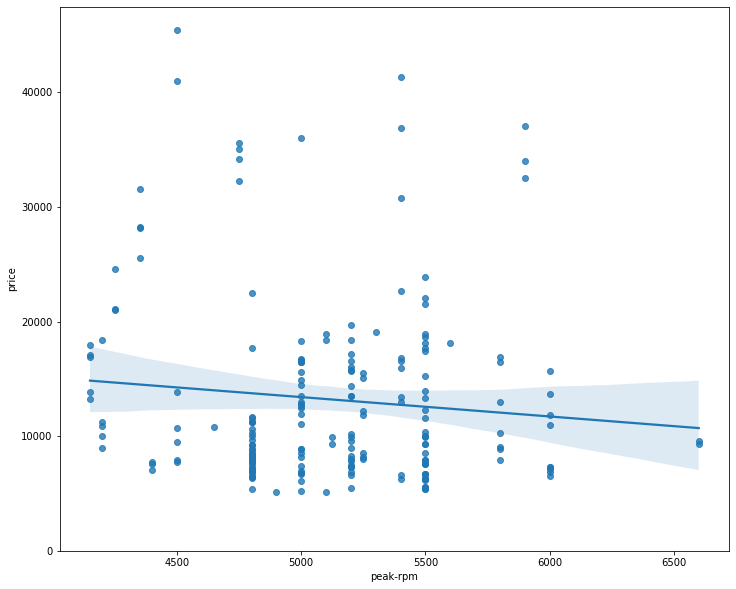

In [25]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

In [28]:
# Al comparar el gráfico de regresión de "peak-rpm" y "highway-mpg", vemos que los puntos para "highway-mpg" están mucho más cerca de la línea generada y, en promedio, disminuyen. 
#Los puntos de "peak-rpm" están más dispersos alrededor de la línea predicha y es mucho más difícil determinar si los puntos disminuyen o aumentan a medida que aumenta el "peak-rpm".

In [29]:
# Dadas las gráficas de regresión anteriores, ¿las "peak-rpm" o "highway-mpg" están más fuertemente correlacionadas con el "price"? 
# Usa el método ".corr()" para verificar tu respuesta.

In [27]:
df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


In [31]:
# La variable "highway-mpg" tiene una correlación más fuerte con "price", es aproximadamente -0.704692 en comparación con "peak-rpm", 
# que es aproximadamente -0.101616. Puedes verificarlo usando el siguiente comando:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


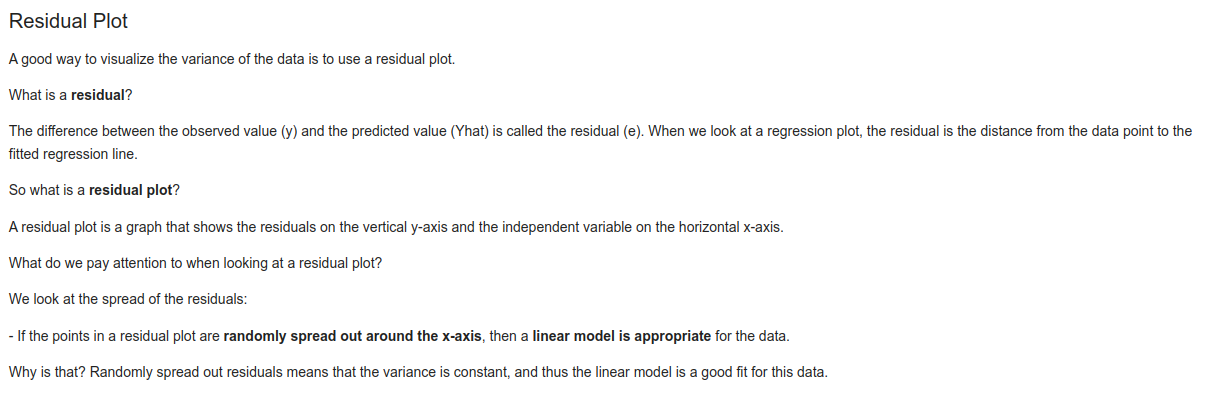

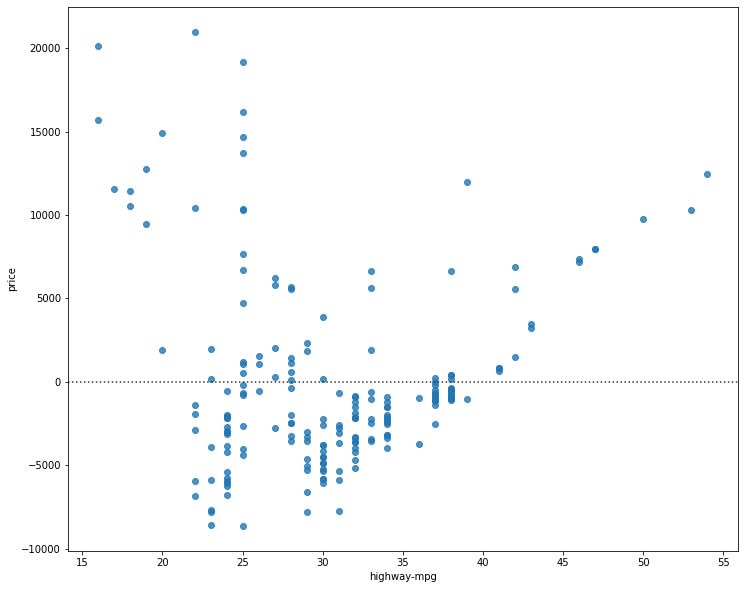

In [32]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

In [ ]:
# ¿Qué nos dice esta gráfica?

# Podemos ver en esta gráfica de residuos que los residuos no se distribuyen aleatoriamente alrededor del eje x, lo que nos lleva a creer que tal vez un modelo no lineal 
# sea más apropiado para estos datos.

##**Multiple Linear Regression**

####¿Cómo visualizamos un modelo de regresión lineal múltiple? Esto se vuelve un poco más complicado porque no se puede visualizar con regresión o gráfico residual.

####Una forma de ver el ajuste del modelo es mirar el gráfico de distribución. Podemos observar la distribución de los valores ajustados que resultan del modelo y compararla con la distribución de los valores reales.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


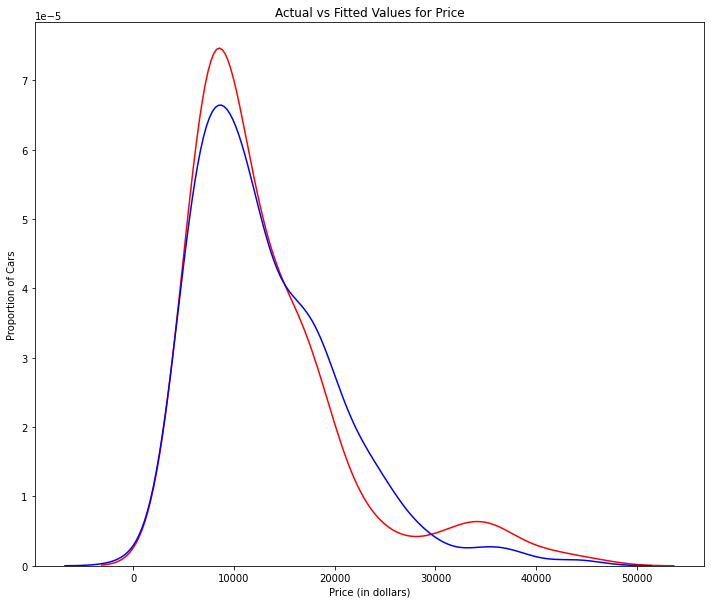

In [33]:
Y_hat = lm.predict(Z)

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

####Podemos ver que los valores ajustados están razonablemente cerca de los valores reales ya que las dos distribuciones se superponen un poco. Sin embargo, definitivamente hay algo de espacio para mejorar.

#**3. Polynomial Regression and Pipelines**

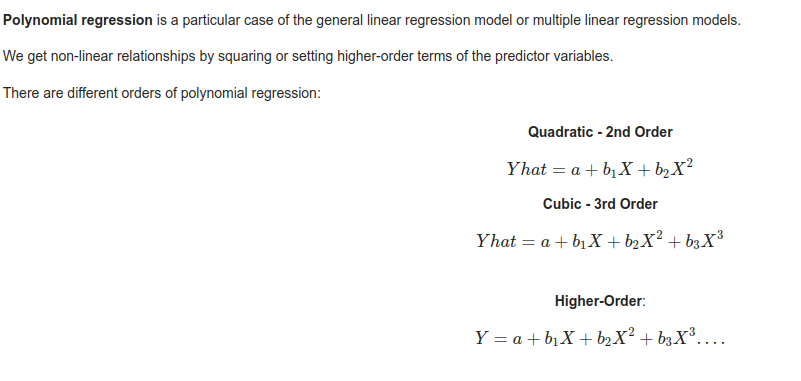

In [ ]:
# Vimos anteriormente que un modelo lineal no proporcionaba el mejor ajuste al utilizar "highway-mpg" como variable de predicción. Veamos si podemos intentar ajustar un 
# modelo polinomial a los datos.

# Usaremos la siguiente función para graficar los datos:

In [34]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [35]:
x = df['highway-mpg']
y = df['price']

In [36]:
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


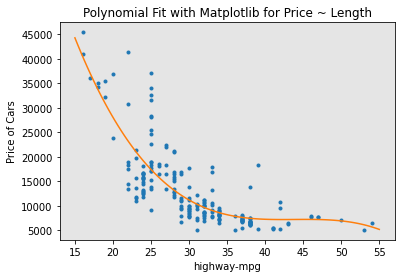

In [37]:
PlotPolly(p, x, y, 'highway-mpg')

In [38]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


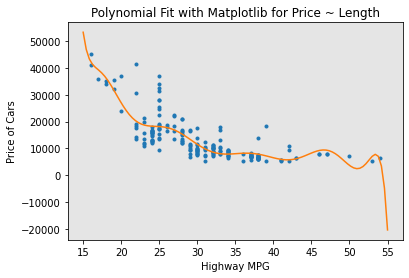

In [39]:
#  Cree un modelo polinomial de órden 11 con las variables x y y de arriba.

f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1,x,y, 'Highway MPG')

In [41]:
#We can perform a polynomial transform on multiple features. First, we import the module:
from sklearn.preprocessing import PolynomialFeatures

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [43]:
Z_pr=pr.fit_transform(Z)
Z_pr.shape

(201, 15)

#**Pipeline**

####Los pipelines de datos simplifican los pasos para procesar los datos. Usamos el módulo Pipeline para crear un pipeline. También usamos StandardScaler como un paso en nuestra canalización.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [45]:
#We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor.
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [47]:
# Ingresamos la lista como un argumento para el constructor del pipeline:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [48]:
# Primero, convertimos el tipo de datos Z al tipo flotante para evitar las advertencias de conversión que pueden aparecer como resultado de que StandardScaler tome entradas flotantes.
# Luego, podemos normalizar los datos, realizar una transformación y ajustar el modelo simultáneamente.

Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [49]:
# De manera similar, podemos normalizar los datos, realizar una transformación y producir una predicción simultáneamente.
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555])

In [50]:
# Crea un pipeline que estandarice los datos, luego produzca una predicción usando un modelo de regresión lineal usando las características Z y el objetivo y.

Input=[('scale',StandardScaler()),('model',LinearRegression())]

pipe=Pipeline(Input)

pipe.fit(Z,y)

ypipe=pipe.predict(Z)
ypipe[0:10]

array([13699.11161184, 13699.11161184, 19051.65470233, 10620.36193015,
       15521.31420211, 13869.66673213, 15456.16196732, 15974.00907672,
       17612.35917161, 10722.32509097])

#**4. Measures for In-Sample Evaluation**

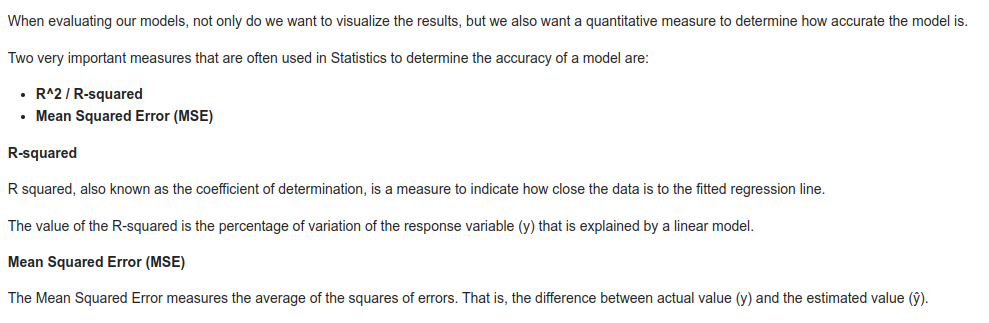

#**Model 1: Simple Linear Regression**

In [52]:
#Calculamos r2

lm.fit(X, Y)
# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.4965911884339176


In [53]:
Yhat=lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [54]:
from sklearn.metrics import mean_squared_error

In [55]:
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


#**Model 2: Multiple Linear Regression**

In [56]:
# fit the model 
lm.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.8093562806577457


In [57]:
Y_predict_multifit = lm.predict(Z)

In [58]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#**Model 3: Polynomial Fit**

In [59]:
from sklearn.metrics import r2_score

In [60]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


#**MSE**

In [61]:
mean_squared_error(df['price'], p(x))

20474146.426361218

#**5. Prediction and Decision Making**

####Predicción####

####En la sección anterior, entrenamos el modelo usando el método de ajuste. Ahora usaremos el método predict para producir una predicción. Permite importar pyplot para trazar; también usaremos algunas funciones de numpy.####

In [62]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [63]:
lm.fit(X, Y)
lm

LinearRegression()

In [64]:
yhat=lm.predict(new_input)
yhat[0:5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

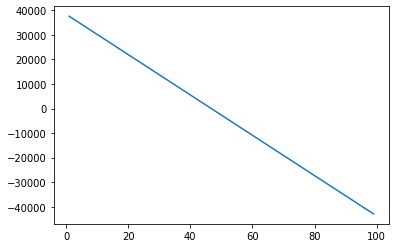

In [65]:
plt.plot(new_input, yhat)
plt.show()

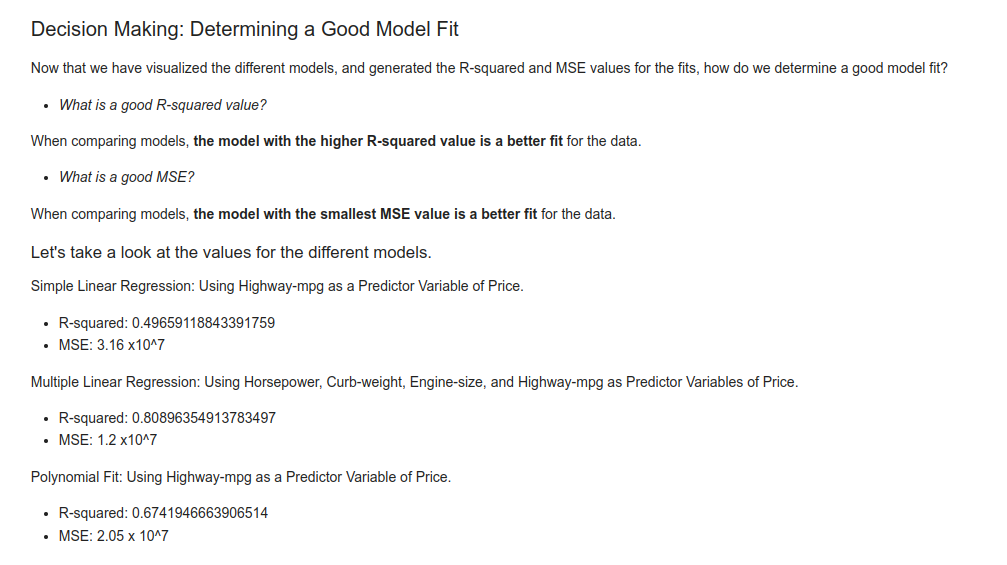

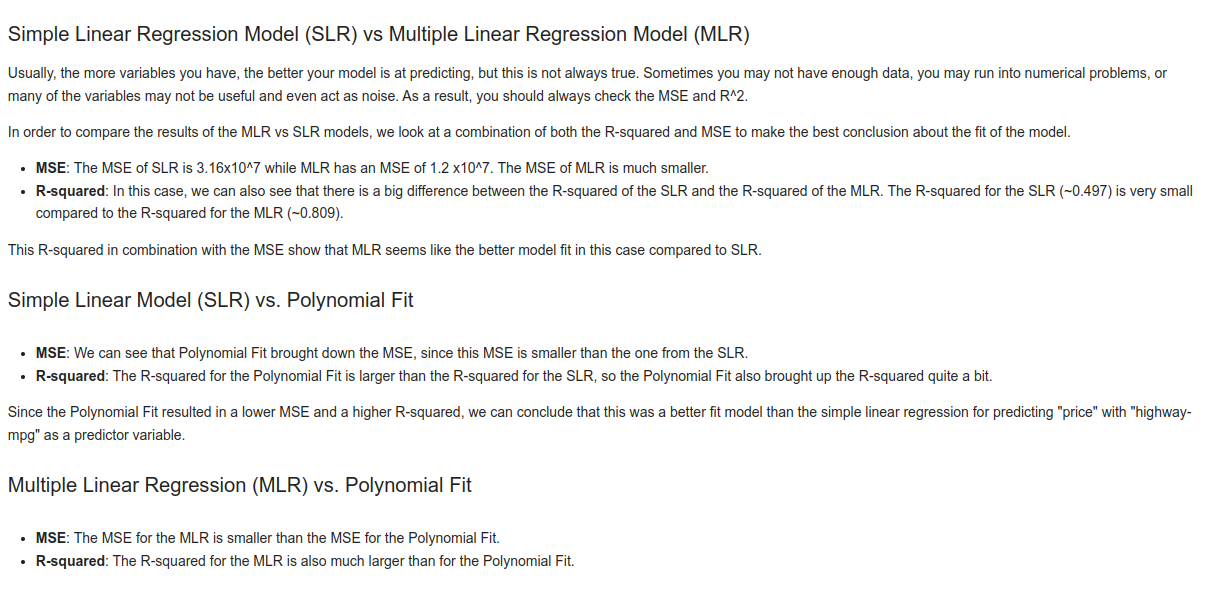